In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import re
import HMM as HMM
import HMM_helper as HMM_helper

In [39]:
#Data Preprocessing

def sonnet_to_list():
    '''Load the sonnets from the file, get rid of the sonnet numbers, convert them all to lowercase, and returns a list
    of sonnets, each of which is a list of lines, each of which is a list of words
    '''
    with open('data/shakespeare.txt') as f:
        #generate a list of lines, all converted to lowercase, and remove trailing whitespace
        lines = []
        for line in f:
            lines.append(line.strip(' ').lower())
        #print(lines)
        #generate a list of sonnets
        sonnets = []
        #use start and end to keep track of each poem
        start, end = 0, 0
        for i, line in enumerate(lines):
            #if the line is a number, that indicates the start of a poem
            if line.split() != [] and line.split()[0].isdigit():
                start = i + 1
            #if we encounter an empty line, that indicates the end of a poem
            #but there are two empty lines at every end of the poem so we need to take care of that
            elif line.split() == []:
                if i - 1 == end:
                    sonnets.append(lines[start: end + 1])
            #when we get to the last poem
            elif i + 1 == len(lines):
                sonnets.append(lines[start: end + 1])
            #otherwise, update end
            else:
                end = i
    #finally, split each line to a list of words
    #sonnets = [i for j in sonnets for k in j for i in k.split()]
    return sonnets

In [118]:
sonnets = sonnet_to_list()
print(sonnets)

[['from fairest creatures we desire increase,\n', "that thereby beauty's rose might never die,\n", 'but as the riper should by time decease,\n', 'his tender heir might bear his memory:\n', 'but thou contracted to thine own bright eyes,\n', "feed'st thy light's flame with self-substantial fuel,\n", 'making a famine where abundance lies,\n', 'thy self thy foe, to thy sweet self too cruel:\n', "thou that art now the world's fresh ornament,\n", 'and only herald to the gaudy spring,\n', 'within thine own bud buriest thy content,\n', "and tender churl mak'st waste in niggarding:\n", 'pity the world, or else this glutton be,\n', "to eat the world's due, by the grave and thee.\n"], ['when forty winters shall besiege thy brow,\n', "and dig deep trenches in thy beauty's field,\n", "thy youth's proud livery so gazed on now,\n", 'will be a tattered weed of small worth held:\n', 'then being asked, where all thy beauty lies,\n', 'where all the treasure of thy lusty days;\n', 'to say within thine own

In [83]:
#Modify functions from HMM_helper
def parse_observations(sonnets):
    # Convert text to dataset.
    obs_counter = 0
    obs = []
    obs_map = {}
    
    for sonnet in sonnets:
        for line in sonnet:
            obs_elem = []
            for word in line.split(' '):
                if word.endswith("\n"):
                    word = word[:-1]
                if word.endswith(',') or word.endswith('.') or word.endswith('?') or word.endswith('!') or word.endswith(';') or word.endswith(':') or word.endswith(')') or word.endswith("'"):
                    word = word[:-1]
                if word.startswith('(') or word.startswith("'"):
                    word = word[1:]
                if word not in obs_map:
                    # Add unique words to the observations map.
                    obs_map[word] = obs_counter
                    obs_counter += 1
                # Add the encoded word.
                obs_elem.append(obs_map[word])
            # Add the encoded sequence.
            obs.append(obs_elem)
    return obs, obs_map

def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

{'from': 0, 'fairest': 1, 'creatures': 2, 'we': 3, 'desire': 4, 'increase': 5, 'that': 6, 'thereby': 7, "beauty's": 8, 'rose': 9, 'might': 10, 'never': 11, 'die': 12, 'but': 13, 'as': 14, 'the': 15, 'riper': 16, 'should': 17, 'by': 18, 'time': 19, 'decease': 20, 'his': 21, 'tender': 22, 'heir': 23, 'bear': 24, 'memory': 25, 'thou': 26, 'contracted': 27, 'to': 28, 'thine': 29, 'own': 30, 'bright': 31, 'eyes': 32, "feed'st": 33, 'thy': 34, "light's": 35, 'flame': 36, 'with': 37, 'self-substantial': 38, 'fuel': 39, 'making': 40, 'a': 41, 'famine': 42, 'where': 43, 'abundance': 44, 'lies': 45, 'self': 46, 'foe': 47, 'sweet': 48, 'too': 49, 'cruel': 50, 'art': 51, 'now': 52, "world's": 53, 'fresh': 54, 'ornament': 55, 'and': 56, 'only': 57, 'herald': 58, 'gaudy': 59, 'spring': 60, 'within': 61, 'bud': 62, 'buriest': 63, 'content': 64, 'churl': 65, "mak'st": 66, 'waste': 67, 'in': 68, 'niggarding': 69, 'pity': 70, 'world': 71, 'or': 72, 'else': 73, 'this': 74, 'glutton': 75, 'be': 76, 'eat':

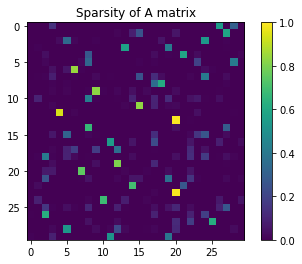

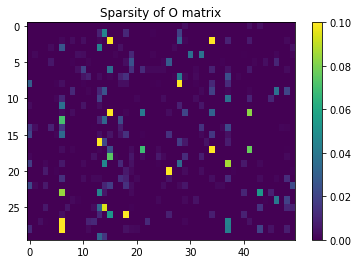

In [162]:
obs, obs_map = parse_observations(sonnets)
hmm = HMM.unsupervised_HMM(obs, 30, 100)
HMM_helper.visualize_sparsities(hmm, O_max_cols=50)

In [177]:
print(obs_map)

{'from': 0, 'fairest': 1, 'creatures': 2, 'we': 3, 'desire': 4, 'increase': 5, 'that': 6, 'thereby': 7, "beauty's": 8, 'rose': 9, 'might': 10, 'never': 11, 'die': 12, 'but': 13, 'as': 14, 'the': 15, 'riper': 16, 'should': 17, 'by': 18, 'time': 19, 'decease': 20, 'his': 21, 'tender': 22, 'heir': 23, 'bear': 24, 'memory': 25, 'thou': 26, 'contracted': 27, 'to': 28, 'thine': 29, 'own': 30, 'bright': 31, 'eyes': 32, "feed'st": 33, 'thy': 34, "light's": 35, 'flame': 36, 'with': 37, 'self-substantial': 38, 'fuel': 39, 'making': 40, 'a': 41, 'famine': 42, 'where': 43, 'abundance': 44, 'lies': 45, 'self': 46, 'foe': 47, 'sweet': 48, 'too': 49, 'cruel': 50, 'art': 51, 'now': 52, "world's": 53, 'fresh': 54, 'ornament': 55, 'and': 56, 'only': 57, 'herald': 58, 'gaudy': 59, 'spring': 60, 'within': 61, 'bud': 62, 'buriest': 63, 'content': 64, 'churl': 65, "mak'st": 66, 'waste': 67, 'in': 68, 'niggarding': 69, 'pity': 70, 'world': 71, 'or': 72, 'else': 73, 'this': 74, 'glutton': 75, 'be': 76, 'eat':

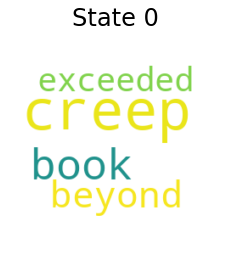

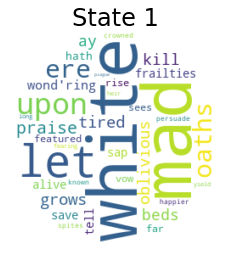

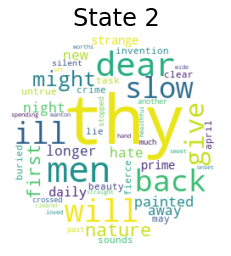

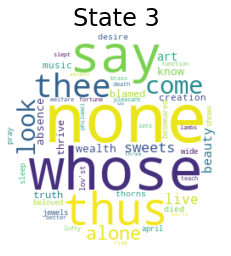

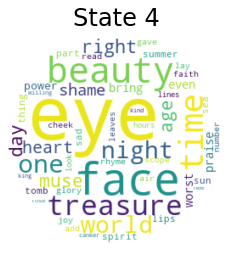

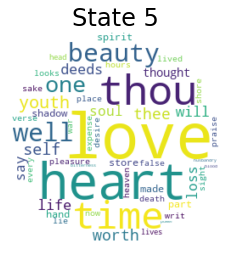

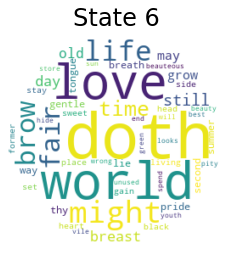

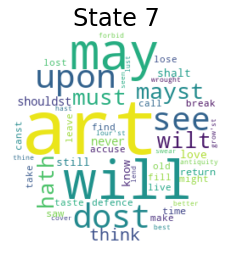

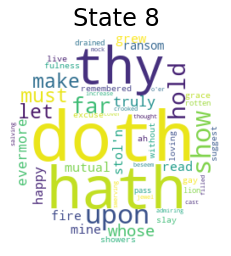

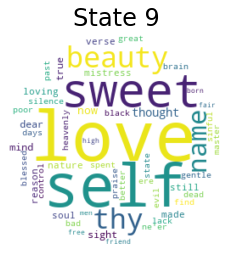

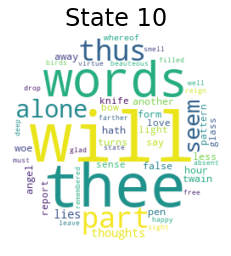

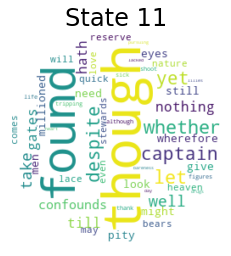

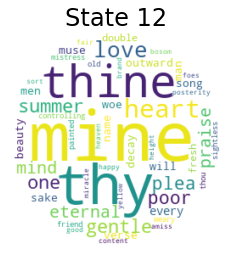

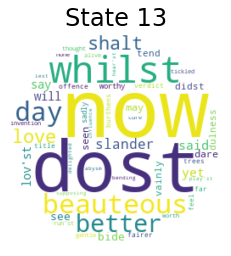

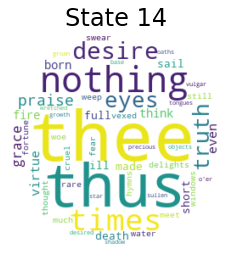

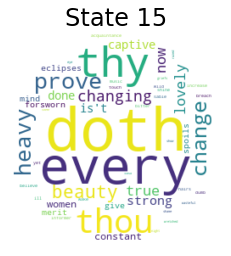

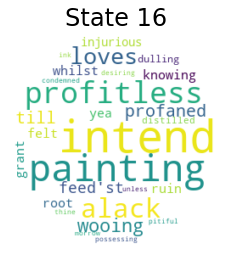

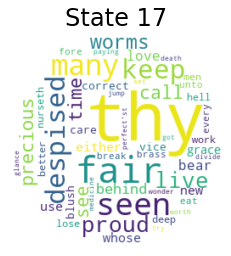

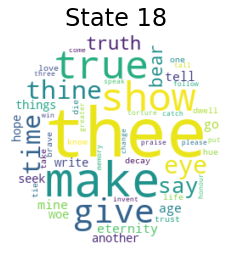

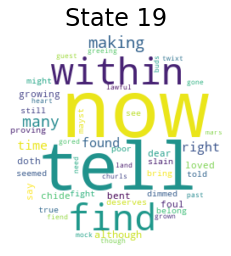

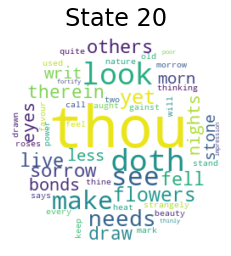

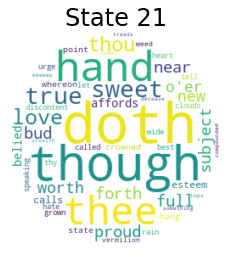

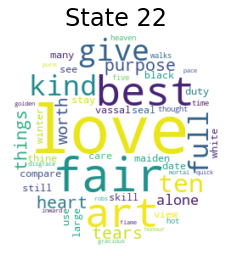

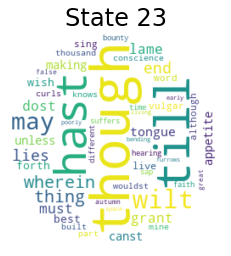

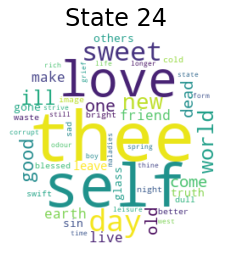

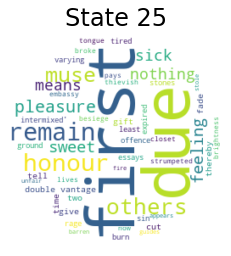

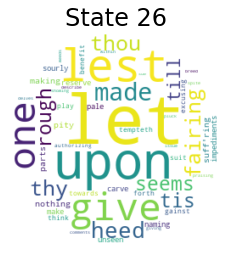

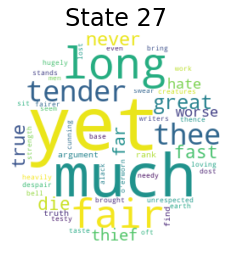

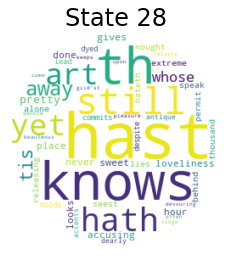

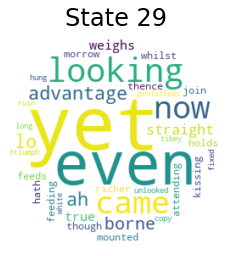

In [176]:
wordclouds = HMM_helper.states_to_wordclouds(hmm, obs_map)

In [163]:
def get_syllable_dict():    
    syllable = dict()
    end_syllable = dict()
    with open('data/Syllable_dictionary.txt') as f:
        for line in f:
            if line.split() == []:
                continue
            numb = line.strip().split(' ')
            if numb[0].startswith("'"):
                numb[0] = numb[0][1:] #for words like 'gainst
            syllable.update({numb[0]:numb[-1]})
            if numb[1].startswith("E"):
                end_syllable.update({numb[0]:numb[1]})
            #word_syllable = line.split()
            #do we need to care about that stupid E1 E2???
            #if word_syllable[0].startswith("'"):
                #word_syllable[0] = word_syllable[0][1:] #for words like 'gainst
            #syllable.update({word_syllable[0]:word_syllable[-1]})
    f.close()
    return syllable, end_syllable
syllable, end_syllable = get_syllable_dict()
print(end_syllable)

{'greeing': 'E1', 'a-doting': 'E2', 'acquainted': 'E2', 'amazeth': 'E2', 'another': 'E2', 'any': 'E1', 'arising': 'E2', 'assemble': 'E2', 'assured': 'E2', 'attainted': 'E2', 'bearing': 'E1', 'better': 'E1', 'bevel': 'E1', 'blindness': 'E1', 'broken': 'E1', 'chary': 'E1', 'cherish': 'E1', 'clearer': 'E1', 'comment': 'E1', 'committed': 'E2', 'controlling': 'E2', 'convertest': 'E2', 'correction': 'E2', 'cover': 'E1', 'created': 'E2', 'creature': 'E1', 'cruel': 'E1', 'dearer': 'E1', 'dearly': 'E1', 'deceived': 'E2', 'deceivest': 'E2', 'defeated': 'E2', 'delighted': 'E2', 'departest': 'E2', 'deserving': 'E2', 'desired': 'E2', 'despised': 'E2', 'despising': 'E2', 'devil': 'E1', 'directed': 'E2', 'disdaineth': 'E2', 'dulness': 'E1', 'esteeming': 'E2', 'evil': 'E1', 'faces': 'E1', 'fashion': 'E1', 'favour': 'E1', 'feature': 'E1', 'feeding': 'E1', 'fever': 'E1', 'fitted': 'E1', 'flatter': 'E1', 'forgotten': 'E2', 'forsaken': 'E2', 'fulness': 'E1', 'gathered': 'E1', 'gazeth': 'E1', 'gladly': 'E1

In [164]:
obs, obs_map = parse_observations(sonnets)
obs_map_r = obs_map_reverser(obs_map)
syl = [] #syllable count fo the word of that index in self.O
for word in obs_map.keys():
    if word not in syllable.keys():
        syl.append('0')
    elif not syllable[word].isdigit():
        syl.append('0')
    else: 
        syl.append(syllable[word])
def generate_emission(obs_map_r, syl_dict, end_syl_dict):
    '''Generates a line in the poem.'''
    state = np.random.choice(hmm.L, p = hmm.A_start)
    emi = np.random.choice(hmm.D, p = hmm.O[state])
    word = obs_map_r.get(emi)
    available_syllables = 10
    curr_states = []
    curr_word = []
    if syl_dict.get(word) is None: 
        syl_count = 1
    elif not syl_dict.get(word).isdigit(): 
        syl_count = 1
    else: 
        syl_count = int(syl_dict.get(word))
    available_syllables -= syl_count

    while True:
        curr_states.append(state)
        curr_word.append(word)      
        if available_syllables == 0:
            break

        state = np.random.choice(hmm.L, p = hmm.A[state])
        index = [int(syl[i]) > available_syllables for i in range(len(syl))] #all not okay ones
        curr_O = np.array(hmm.O[state])
        for i in range(len(index)):
            if index[i]:
                curr_O[i] = 0
        curr_O /= np.sum(curr_O)
        emi = np.random.choice(hmm.D, p = curr_O)
        word = obs_map_r.get(emi)
        if syl_dict.get(word) is None: 
            syl_count = 1
        elif not syl_dict.get(word).isdigit(): 
            syl_count = 1
        else: 
            syl_count = int(syl_dict.get(word))
        available_syllables -= syl_count
    return curr_word, curr_states

In [165]:
generate_emission(obs_map_r, syllable, end_syllable)

(['for', 'yet', 'pleasure', 'thy', 'the', 'thy', 'perish', 'them'],
 [1, 27, 25, 8, 17, 12, 4, 21])

In [198]:
def sample_poem(rhyme = False):
    if rhyme == True:
        poem, states = sample_poem_with_rhyme()
        output = ''
        i = 0
        for line in poem:
            i += 1
            if i == 13 or i == 14:
                output += '  '
            for word in line:
                if word in ['gainst', 'greeing', 'scaped', 'tis', 'twixt']:
                    word = "'" + word
                output += word + ' '
            if i % 2 != 0:
                output = output[:-1] + ', '
            else: 
                output = output[:-1] + '. '
            output += '\n'
        print(output)
        return
    poem = []
    for _ in range(14):
        words, states = generate_emission(obs_map_r, syllable, end_syllable)
        poem.append(words)
    output = ''
    i = 0
    for line in poem:
        i += 1
        if i == 13 or i == 14:
            output += '  '
        for word in line:
            if word in ['gainst', 'greeing', 'scaped', 'tis', 'twixt']:
                word = "'" + word
            output += word + ' '
        if i % 2 != 0:
            output = output[:-1] + ', '
        else: 
            output = output[:-1] + '. '
        output += '\n'
    print(output)

In [190]:
sample_poem()

insults costly to hear rank in east birth, 
long in great most room are but wherefore a. 
will thou have sweet who now fresh careful to, 
the best of sleep sacred heart thou or dig. 
in win thy catch my free deserts judgment, 
true be love times more a the bring anchored. 
all being as sinful field dead now and, 
will of untold thy live thoughts happier me. 
to wretch's and it not world and progress, 
mad spirit second heaven it brow wide. 
gaudy youth in my thine time o'er to fair, 
the one and comfort of misplaced me doubt. 
  where afford time give temptation brains false, 
  dost from with happier strange good pen thy sight. 



In [168]:
wordlist = list(syllable.keys())

In [169]:
def managewords(word):
    if word.endswith("\n"):
        word = word[:-1]
    if word.endswith(',') or word.endswith('.') or word.endswith('?') or word.endswith('!') or word.endswith(';') or word.endswith(':') or word.endswith(')') or word.endswith("'"):
        word = word[:-1]
    if word.startswith('(') or word.startswith("'"):
        word = word[1:]
    return word

In [178]:
from collections import defaultdict
def rhymes(sonnets, obs_map):
    psy = defaultdict(set)
    special_sonnets = [98,125,153] #Sonnets that don't have exactly 14 lines should be ignored
    for i, sonnet in enumerate(sonnets):
        index = 0
        for quatrain in range(3): #3 quatrains, 1 couplet
            a1 = managewords(sonnet[index].split()[-1])
            b1 = managewords(sonnet[index + 1].split()[-1])
            a2 = managewords(sonnet[index + 2].split()[-1])
            b2 = managewords(sonnet[index + 3].split()[-1])
            psy[obs_map.get(a1)].add(obs_map.get(a2))
            psy[obs_map.get(a2)].add(obs_map.get(a1))
            psy[obs_map.get(b1)].add(obs_map.get(b2))
            psy[obs_map.get(b2)].add(obs_map.get(b1))
            index += 4
        if i not in special_sonnets:
            g1 = managewords(sonnet[12].split()[-1])
            g2 = managewords(sonnet[13].split()[-1])
            psy[obs_map.get(g1)].add(obs_map.get(g2))
            psy[obs_map.get(g2)].add(obs_map.get(g1))
    return psy

In [180]:
psy = rhymes(sonnets, obs_map)
print(psy)

defaultdict(<class 'set'>, {5: {512, 674, 20}, 20: {589, 5}, 12: {2329, 7, 25, 1146, 252}, 25: {1675, 12, 692, 2076, 670}, 32: {1990, 2504, 3019, 45, 2765, 1077, 1686}, 45: {32, 2991}, 39: {50}, 50: {1033, 39}, 55: {64}, 64: {2063, 55}, 60: {649, 418, 1829, 69}, 69: {60}, 76: {488, 2314, 394, 141, 80, 496, 2484}, 80: {1475, 76, 141, 109, 496, 177, 80, 309, 213}, 86: {52, 806, 1788}, 52: {120, 2267, 2460, 86}, 90: {103}, 103: {90, 924}, 111: {2394, 1871, 119}, 119: {111}, 124: {136, 850, 216}, 136: {124}, 130: {1810, 1981, 29, 1205}, 29: {130, 2532, 1205}, 135: {146, 540, 1485}, 146: {600, 540, 135}, 151: {158}, 158: {151}, 154: {163}, 163: {154}, 167: {174}, 174: {910, 718, 167}, 170: {177}, 177: {80, 170, 1682}, 141: {80, 2489, 76}, 184: {19}, 19: {184, 801, 695}, 200: {208, 1129, 1636, 454}, 208: {200, 1129, 1636}, 202: {213}, 213: {80, 496, 202}, 216: {124}, 220: {192}, 192: {1906, 220}, 229: {1190, 232, 3026, 1587, 319}, 232: {96, 1117, 229}, 230: {236}, 236: {230}, 249: {257}, 257

In [200]:
def sample_poem_with_rhyme():
    obs, obs_map = parse_observations(sonnets)
    obs_map_r = obs_map_reverser(obs_map)
    syl = [] 
    for word in obs_map.keys():
        if word not in syllable.keys():
            syl.append('0')
        elif not syllable[word].isdigit():
            syl.append('0')
        else: 
            syl.append(syllable[word])
    poem = ['' for i in range(14)]
    words = []
    states = []
    last_words = []
    for i in range(14):
        available_syllable = 10
        curr_states = []
        curr_word = []
        if i not in [2,3,6,7,10,11,13]:
            state = np.random.choice(hmm.L, p = hmm.A_start)
            words_that_rhyme = list(psy.keys())
            curr_O = np.array(hmm.O[state])
            for k in range(len(curr_O)):
                if k not in words_that_rhyme:
                    curr_O[k] = 0
            if np.sum(curr_O) > 0:
                curr_O /= np.sum(curr_O)
                emi = np.random.choice(hmm.D, p = curr_O)
            else: 
                emi = np.random.choice(hmm.D, p = None)
            word = obs_map_r.get(emi)
        else:
            if i == 13:
                word_to_rhyme = obs_map[last_words[i - 1]]
            else: 
                word_to_rhyme = obs_map[last_words[i - 2]]
            candidates = psy[word_to_rhyme]
            state = np.random.choice(hmm.L, p = hmm.A_start)
            curr_O = np.array(hmm.O[state])
            for j in range(len(curr_O)):
                if j not in candidates:
                    curr_O[j] = 0
            if np.sum(curr_O) > 0:
                curr_O /= np.sum(curr_O)
                emi = np.random.choice(hmm.D, p = curr_O)
            else: 
                emi = np.random.choice(hmm.D, p = None)
            word = obs_map_r.get(emi)
        last_words.append(word)
        
        if syllable.get(word) is None: 
            break
        elif not syllable.get(word).isdigit(): 
            break
        else: 
            syl_count = int(syllable.get(word))
        available_syllable -= syl_count
        
        while True:
            curr_states.append(state)
            curr_word.append(word)      
            if available_syllable == 0:
                break
            if np.sum(hmm.A[:, state]) != 0:
                p_state = hmm.A[:,state]/np.sum(hmm.A[:,state])
                state = np.random.choice(hmm.L, p = p_state)
                index = [int(syl[i]) > available_syllable for i in range(len(syl))]
                curr_O = np.array(hmm.O[state])
                for i in range(len(index)):
                    if index[i]:
                        curr_O[i] = 0
                if np.sum(curr_O) != 0:
                    curr_O /= np.sum(curr_O)
                    emi = np.random.choice(hmm.D, p = curr_O)
                    word = obs_map_r.get(emi)
            if syllable.get(word) is None: 
                break
            elif not syllable.get(word).isdigit(): 
                break
                syl_count = 1
            else: 
                syl_count = int(syllable.get(word))
            available_syllable -= syl_count
        
        curr_word = curr_word[::-1] 
        curr_states = curr_states[::-1]
        words.append(curr_word)
        states.append(curr_states)
    return words, states


In [185]:
words, states = sample_poem_with_rhyme()

In [186]:
print(words)

[['o', 'mixed', 'on', 'beseechers', 'muse', 'and', 'o', 'by'], ['dreams', 'and', 'yet', 'serving', 'for', 'abysm', 'i', 'truth'], ['o', 'let', 'sinks', 'the', 'take', 'bends', 'wary', 'him', 'lie'], ['ah', 'hers', 'or', 'thine', 'in', 'nor', 'thou', 'am', 'thee', 'youth'], ['fall', 'prove', 'issueless', 'yet', 'thou', 'for', 'my', 'him'], ['how', 'state', 'allow', 'of', 'succeeding', 'not', 'words'], ['now', 'thy', 'folly', 'conceit', 'to', 'the', 'gently'], ['figures', 'no', 'than', 'richer', 'and', 'buy', 'profit'], ['save', 'none', 'to-day', 'smells', 'in', 'again', 'lies', 'so'], ['of', 'leisure', 'so', 'that', 'we', 'eternal', 'sport'], ['love', 'in', 'gentle', 'leaves', 'when', 'in', 'friends', 'war', 'show'], ['better', 'but', 'sigh', 'are', 'as', 'as', 'for', 'report'], ['that', 'where', 'unknown', 'statute', 'care', 'power', 'with', 'were'], ['deserve', 'that', 'she', 'am', 'i', 'long', 'still', 'mad', 'near']]


In [201]:
sample_poem(True)

youth by self fortune you me nor that too, 
cannot fickle speed to your my change words. 
life light and like essays to the the do, 
when work love learning these the affords. 
who art a is and do now and change love, 
is me nimble of glance the even part. 
checked least alone when or like her rage prove, 
west sin which breach for sickle's belied heart. 
or take down with are who and me and is, 
very with my made boast but holds o lies. 
and my live but call are hell dead amiss, 
with which of outworn and my you dear eyes. 
  thousand beauty of first mournful near then, 
  untold several fire testy lofty men. 



In [3]:
print('Youth by self fortune you me nor that too,\nCannot fickle speed to your my change words.\nLife light and like essays to the the do,\nWhen work love learning these the affords.\nWho art a is and do now and change love,\nIs me nimble of glance the even part.\nChecked least alone when or like her rage prove,\nWest sin which breach for sickle\'s belied heart.\nOr take down with are who and me and is,\nVery with my made boast but holds o lies.\nAnd my live but call are hell dead amiss,\nWith which of outworn and my you dear eyes.\n  Thousand beauty of first mournful near then,\n  Untold several fire testy lofty men.\n')



Youth by self fortune you me nor that too,
Cannot fickle speed to your my change words.
Life light and like essays to the the do,
When work love learning these the affords.
Who art a is and do now and change love,
Is me nimble of glance the even part.
Checked least alone when or like her rage prove,
West sin which breach for sickle's belied heart.
Or take down with are who and me and is,
Very with my made boast but holds o lies.
And my live but call are hell dead amiss,
With which of outworn and my you dear eyes.
  Thousand beauty of first mournful near then,
  Untold several fire testy lofty men.

